# Clustering de Enfermedades Respiratorias en Bogotá
Este ejercicio busca identificar agrupaciones espaciales de casos de enfermedades respiratorias en Bogotá durante los años 2021 y 2022, usando el algoritmo K-Means.


## 1. Importar librerías necesarias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## 2. Cargar la base de datos
En este paso leemos el archivo CSV que contiene los registros de atención médica con coordenadas geográficas.

In [3]:
# Leer el archivo CSV con separador de columnas y posibles comas como separador decimal
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/6_Sexta_Sesion/Datos/BaseDatos_Coordenadas_v12.csv'
df = pd.read_csv(ruta, sep=';', decimal=',')

# Mostrar las primeras filas
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68822 entries, 0 to 68821
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0.8              68822 non-null  int64 
 1   Unnamed: 0.7              68822 non-null  int64 
 2   Unnamed: 0.6              68822 non-null  int64 
 3   Unnamed: 0.5              68822 non-null  int64 
 4   Unnamed: 0.4              68822 non-null  int64 
 5   Unnamed: 0.3              68822 non-null  int64 
 6   Unnamed: 0.2              68822 non-null  int64 
 7   Unnamed: 0.1              68822 non-null  int64 
 8   Unnamed: 0                68822 non-null  int64 
 9   reasignación ID           68822 non-null  int64 
 10  Nombre Servicio           68822 non-null  object
 11  Dias de Estancia General  68822 non-null  int64 
 12  Dias de Estancia UCI      68822 non-null  int64 
 13  Fecha Asignación Cita     68822 non-null  int64 
 14  Hora de Asignacion    

<ipython-input-3-589ea546d295>:3: DtypeWarning: Columns (26,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep=';', decimal=',')


,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reasignación ID,...,Nombre Valor Pasivo,Direccion,lati,longi,Unnamed: 16,Unnamed: 17,Address,lat,long,lng
0,0,0,0,0,0,0,0,0,0,174435,...,URGENCIAS,CL 165 N 106 23,NaN,NaN,NaN,NaN,CL 165 N 106 23 Bogota,4.7588151,-74.0907661,NaN
1,1,1,1,1,1,1,1,1,1,152007,...,URGENCIAS,CL 42 27 28 APTO 103,NaN,NaN,NaN,NaN,CL 42 27 28 APTO 103 Bogota,4.6328416,-74.077761,NaN
2,2,2,2,2,2,2,2,2,2,101730,...,URGENCIAS,CR 2 BIS A 27 A 42 SUR,NaN,NaN,NaN,NaN,CR 2 BIS A 27 A 42 SUR Bogota,4.5663706,-74.0925244,NaN
3,3,3,3,3,3,3,3,3,3,112014,...,URGENCIAS,CL 35 SUR 3 21,NaN,NaN,NaN,NaN,CL 35 SUR 3 21 Bogota,4.5611679,-74.09710000000001,NaN
4,4,4,4,4,4,4,4,4,4,160442,...,URGENCIAS,CL 187 11 A 29,NaN,NaN,NaN,NaN,CL 187 11 A 29 Bogota,4.763919899999999,-74.0337235,NaN



## 3. Filtrar Base de Datos para Registros de

```
df['Nombre Diagnostico'] =='RINOFARINGITIS AGUDA (RESFRIADO COMUN)'
```



In [4]:
df['Nombre Diagnostico']
df[df['Nombre Diagnostico'] == 'RINOFARINGITIS AGUDA (RESFRIADO COMUN)']

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reasignación ID,...,Nombre Valor Pasivo,Direccion,lati,longi,Unnamed: 16,Unnamed: 17,Address,lat,long,lng
0,0,0,0,0,0,0,0,0,0,174435,...,URGENCIAS,CL 165 N 106 23,NaN,NaN,NaN,NaN,CL 165 N 106 23 Bogota,4.7588151,-74.0907661,NaN
2,2,2,2,2,2,2,2,2,2,101730,...,URGENCIAS,CR 2 BIS A 27 A 42 SUR,NaN,NaN,NaN,NaN,CR 2 BIS A 27 A 42 SUR Bogota,4.5663706,-74.0925244,NaN
4,4,4,4,4,4,4,4,4,4,160442,...,URGENCIAS,CL 187 11 A 29,NaN,NaN,NaN,NaN,CL 187 11 A 29 Bogota,4.763919899999999,-74.0337235,NaN
8,8,8,8,8,8,8,8,8,8,188426,...,URGENCIAS,CR 81 B 6 B 85 APTO CA 99,NaN,NaN,NaN,NaN,CR 81 B 6 B 85 APTO CA 99 Bogota,4.6398316,-74.1519113,NaN
10,10,10,10,10,10,10,10,10,10,167996,...,URGENCIAS,CR 86 5 08,NaN,NaN,NaN,NaN,CR 86 5 08 Bogota,4.6398936,-74.157183,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68811,68811,68811,68811,68811,68811,68811,68811,68811,68811,108923,...,APOYO TERAPEUTICO,CL 152 96 A 39 INT 3 APTO O 101,NaN,NaN,NaN,NaN,CL 152 96 A 39 INT 3 APTO O 101 Bogota,4.7394377,NaN,-74.0679566
68814,68814,68814,68814,68814,68814,68814,68814,68814,68814,156291,...,URGENCIAS,CL 151 92 72,NaN,NaN,NaN,NaN,CL 151 92 72 Bogota,4.7470031,NaN,-74.0850485
68817,68817,68817,68817,68817,68817,68817,68817,68817,68817,161728,...,URGENCIAS,CR 1 38 40 CS 248,NaN,NaN,NaN,NaN,CR 1 38 40 CS 248 Bogota,4.5525422,NaN,-74.09751039999999
68818,68818,68818,68818,68818,68818,68818,68818,68818,68818,126453,...,URGENCIAS,CR 79 B 46 70 SUR,NaN,NaN,NaN,NaN,CR 79 B 46 70 SUR Bogota,4.6185994,NaN,-74.1657183


In [5]:
frecuencia_diagnosticos = df['Nombre Diagnostico'].value_counts()
print(frecuencia_diagnosticos)

# Filtrar los casos con diagnóstico de rinofaringitis aguda
df = df[df['Nombre Diagnostico'] == 'RINOFARINGITIS AGUDA (RESFRIADO COMUN)']
df.info()

Nombre Diagnostico
RINOFARINGITIS AGUDA (RESFRIADO COMUN)                                    21634
BRONQUIOLITIS AGUDA, NO ESPECIFICADA                                       6007
BRONQUITIS AGUDA, NO ESPECIFICADA                                          5438
SINDROME DE DIFICULTAD RESPIRATORIA DEL ADULTO                             3809
INFECCION AGUDA NO ESPECIFICADA DE LAS VIAS RESPIRATORIAS                  2230
                                                                          ...  
TRASTORNOS PULMONARES INTERSTICIALES AGUDOS INDUCIDOS POR DROGAS              1
AFECCIONES RESPIRATORIAS DEBIDAS A OTROS AGENTES EXTERNOS ESPECIFICADO        1
ENFERMEDAD PULMONAR REUMATOIDE (M05.1.)                                       1
BISINOSIS                                                                     1
NEUMONITIS DE LA VENTILACION DEBIDA AL ACONDICIONADOR Y HUMIDIFICADOR         1
Name: count, Length: 226, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 21634 entries, 0 

# **Preguntas Aplicativas**

## 4. Filtrar datos válidos de Latitud y Longitud
Seleccionamos únicamente las filas que tienen coordenadas (`lat` y `long`) válidas.

In [6]:
# Filtrar filas con coordenadas válidas, conservando todas las columnas
df_filtrado = df[
    (df['lat'].notna()) & (df['long'].notna()) &
    (df['lat'] != '') & (df['long'] != '')
].copy()

# Convertir coordenadas a float
df_filtrado['lat'] = df_filtrado['lat'].astype(float)
df_filtrado['long'] = df_filtrado['long'].astype(float)

# Aplicar filtro espacial para Bogotá
df_filtrado = df_filtrado[
    (df_filtrado['lat'] >= 4.45) & (df_filtrado['lat'] <= 4.85) &
    (df_filtrado['long'] >= -74.3) & (df_filtrado['long'] <= -73.9)
]

# Mostrar resultado
print(f"Registros dentro de Bogotá: {df_filtrado.shape[0]}")
df_filtrado.head()

Registros dentro de Bogotá: 12013


,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reasignación ID,...,Nombre Valor Pasivo,Direccion,lati,longi,Unnamed: 16,Unnamed: 17,Address,lat,long,lng
0,0,0,0,0,0,0,0,0,0,174435,...,URGENCIAS,CL 165 N 106 23,NaN,NaN,NaN,NaN,CL 165 N 106 23 Bogota,4.758815,-74.090766,NaN
2,2,2,2,2,2,2,2,2,2,101730,...,URGENCIAS,CR 2 BIS A 27 A 42 SUR,NaN,NaN,NaN,NaN,CR 2 BIS A 27 A 42 SUR Bogota,4.566371,-74.092524,NaN
4,4,4,4,4,4,4,4,4,4,160442,...,URGENCIAS,CL 187 11 A 29,NaN,NaN,NaN,NaN,CL 187 11 A 29 Bogota,4.763920,-74.033723,NaN
8,8,8,8,8,8,8,8,8,8,188426,...,URGENCIAS,CR 81 B 6 B 85 APTO CA 99,NaN,NaN,NaN,NaN,CR 81 B 6 B 85 APTO CA 99 Bogota,4.639832,-74.151911,NaN
10,10,10,10,10,10,10,10,10,10,167996,...,URGENCIAS,CR 86 5 08,NaN,NaN,NaN,NaN,CR 86 5 08 Bogota,4.639894,-74.157183,NaN


## 5. Visualización inicial de los puntos en un gráfico simple

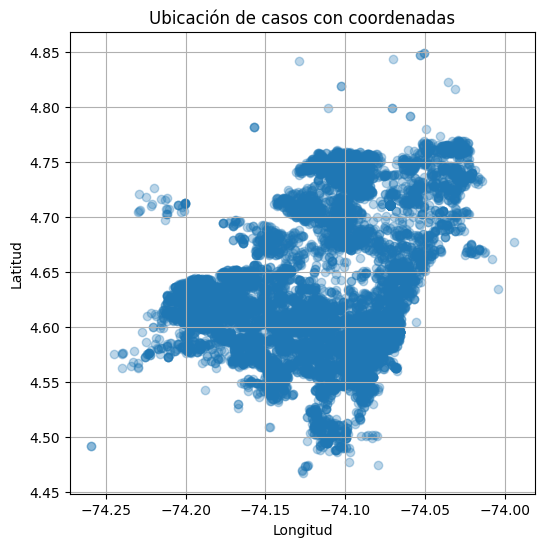

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(df_filtrado['long'], df_filtrado['lat'], alpha=0.3)
plt.title('Ubicación de casos con coordenadas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

## 6. Elegir número de clusters (K) con el método del codo
Calculamos la inercia (error) para diferentes valores de K y vemos dónde se estabiliza.

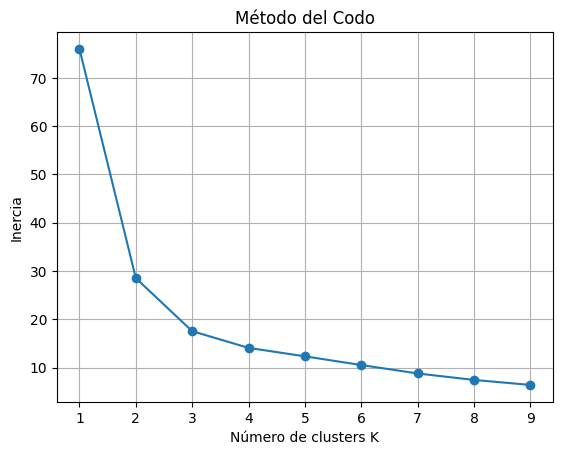

In [8]:
inercia = []
valores_k = range(1, 10)

for k in valores_k:
    modelo = KMeans(n_clusters=k, random_state=0)
    modelo.fit(df_filtrado[['lat', 'long']])
    inercia.append(modelo.inertia_)

plt.plot(valores_k, inercia, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

## 7. Aplicar K-Means con el número de clusters elegido
Aquí usamos un valor de K que se considere adecuado (por ejemplo, 4).

In [9]:
k = 5  # Puedes cambiar este valor
kmeans = KMeans(n_clusters=k, random_state=0)
df_filtrado['cluster'] = kmeans.fit_predict(df_filtrado[['lat', 'long']])
df_filtrado.head()

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,reasignación ID,...,Direccion,lati,longi,Unnamed: 16,Unnamed: 17,Address,lat,long,lng,cluster
0,0,0,0,0,0,0,0,0,0,174435,...,CL 165 N 106 23,NaN,NaN,NaN,NaN,CL 165 N 106 23 Bogota,4.758815,-74.090766,NaN,1
2,2,2,2,2,2,2,2,2,2,101730,...,CR 2 BIS A 27 A 42 SUR,NaN,NaN,NaN,NaN,CR 2 BIS A 27 A 42 SUR Bogota,4.566371,-74.092524,NaN,3
4,4,4,4,4,4,4,4,4,4,160442,...,CL 187 11 A 29,NaN,NaN,NaN,NaN,CL 187 11 A 29 Bogota,4.763920,-74.033723,NaN,1
8,8,8,8,8,8,8,8,8,8,188426,...,CR 81 B 6 B 85 APTO CA 99,NaN,NaN,NaN,NaN,CR 81 B 6 B 85 APTO CA 99 Bogota,4.639832,-74.151911,NaN,0
10,10,10,10,10,10,10,10,10,10,167996,...,CR 86 5 08,NaN,NaN,NaN,NaN,CR 86 5 08 Bogota,4.639894,-74.157183,NaN,0


## 8. Visualizar los clusters en el mapa de dispersión

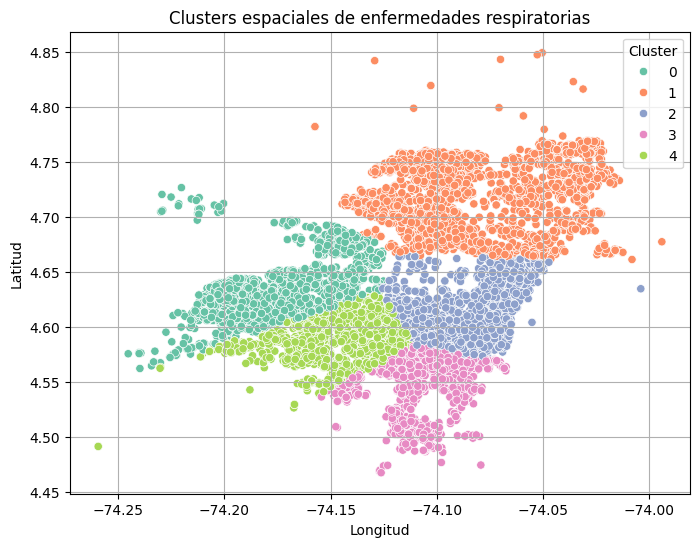

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='cluster', data=df_filtrado, palette='Set2')
plt.title('Clusters espaciales de enfermedades respiratorias')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Preguntas para el análisis de datos**
1. ¿Cuántos casos hay por cada grupo identificado por el modelo de clustering?
2. ¿Cuál es la edad promedio de los pacientes en cada cluster?
3. ¿Cuál es la distribución relativa de género dentro de cada cluster?
4. ¿Cuál es la edad más frecuente (moda) en cada cluster?
5. Clasifica las fechas de asignación de cita según la temporada (lluvias, seca, transición).
6. ¿Cuántos casos hay por ubicación geográfica y género?
7. ¿Cuántas ubicaciones reportan solo casos en mujeres?

In [ ]:
# Importar librerías necesarias
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Bogotá
mapa = folium.Map(location=[4.65, -74.1], zoom_start=11)

# Crear la lista de puntos (latitud, longitud)
puntos_calor = df_filtrado[['lat', 'long']].values.tolist()

# Agregar el mapa de calor
HeatMap(puntos_calor, radius=12, blur=15).add_to(mapa)

# Mostrar el mapa
mapa